## Actiunea SMR

[*********************100%***********************]  1 of 1 completed


Price       Close   High    Low   Open  Volume
Ticker        SMR    SMR    SMR    SMR     SMR
Date                                          
2022-03-01  10.06  10.07  10.04  10.05  370100
2022-03-02  10.08  10.08  10.05  10.07  407500
2022-03-03  10.10  10.12  10.07  10.08  434200
2022-03-04  10.04  10.10  10.04  10.09  184000
2022-03-07  10.05  10.09  10.05  10.08  219100


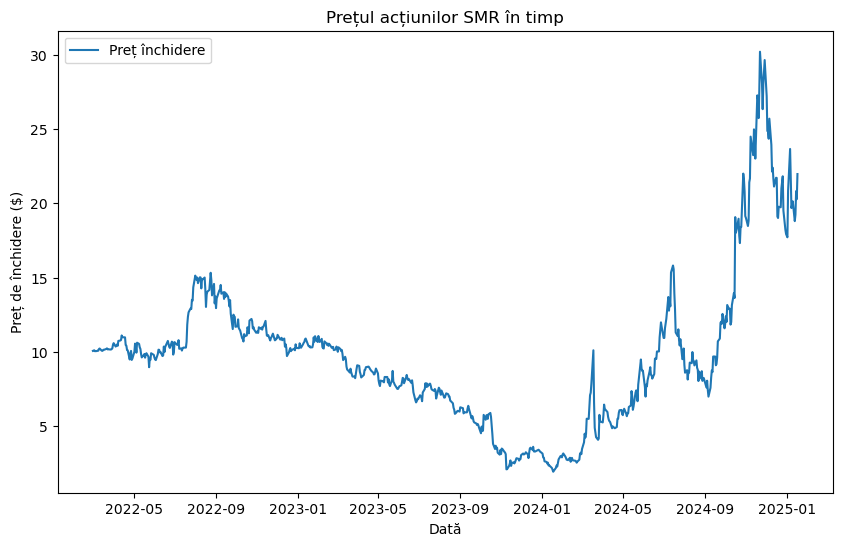

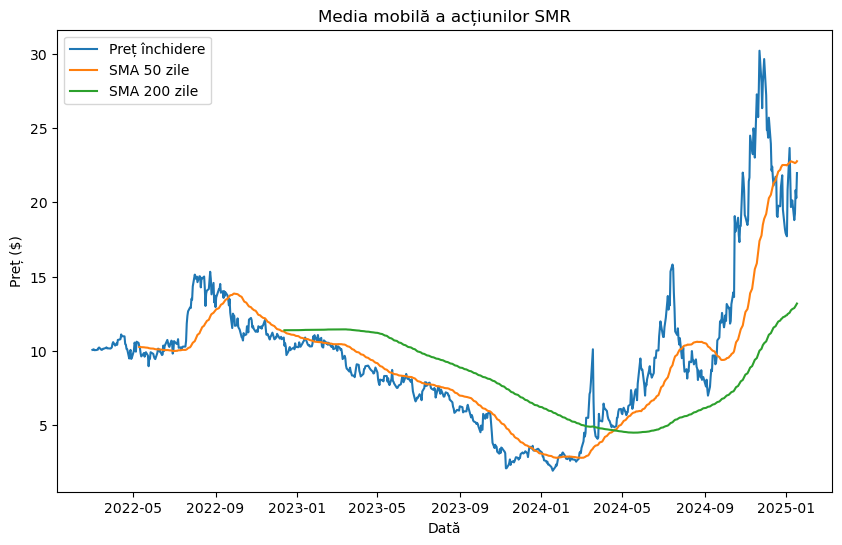

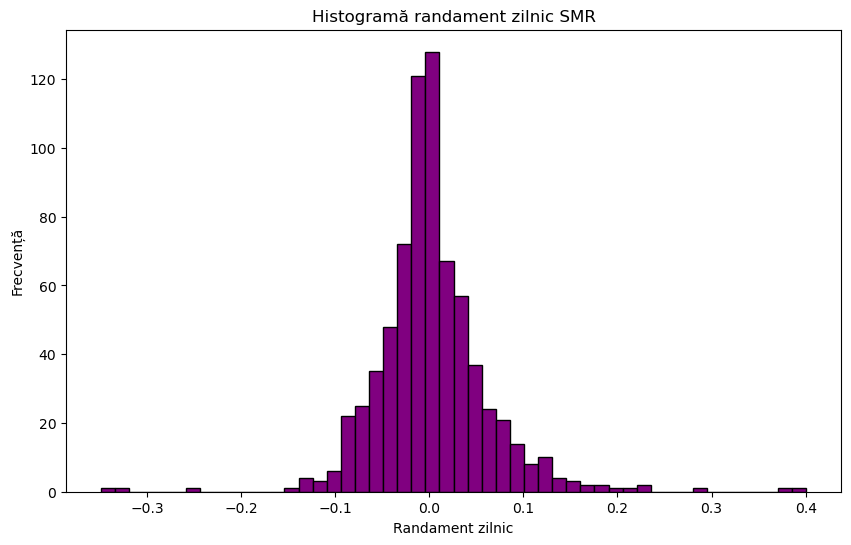

count    724.000000
mean       0.002894
std        0.060657
min       -0.348515
25%       -0.025635
50%       -0.000984
75%        0.028679
max        0.400147
Name: Daily Return, dtype: float64


In [7]:
# Importăm librăriile necesare
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

import datetime as dt
import time
import calendar

# Descărcăm datele acțiunii SMR
symbol = 'SMR'  # Simbolul acțiunii SMR
start = '2020-01-01'
end = dt.datetime.now()
data = yf.download(symbol, start, end)

# Afișăm primele rânduri din datele descărcate
print(data.head())

# Plotăm prețul de închidere
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Preț închidere')
plt.title(f'Prețul acțiunilor {symbol} în timp')
plt.xlabel('Dată')
plt.ylabel('Preț de închidere ($)')
plt.legend()
plt.show()

# Calculăm media mobilă simplă pe 50 de zile și 200 de zile
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

# Plotăm prețul de închidere și mediile mobile
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Preț închidere')
plt.plot(data['SMA50'], label='SMA 50 zile')
plt.plot(data['SMA200'], label='SMA 200 zile')
plt.title(f'Media mobilă a acțiunilor {symbol}')
plt.xlabel('Dată')
plt.ylabel('Preț ($)')
plt.legend()
plt.show()

# Calculăm randamentul zilnic
data['Daily Return'] = data['Close'].pct_change()

# Plotăm histogramă pentru randamente zilnice
plt.figure(figsize=(10, 6))
plt.hist(data['Daily Return'].dropna(), bins=50, color='purple', edgecolor='black')
plt.title(f'Histogramă randament zilnic {symbol}')
plt.xlabel('Randament zilnic')
plt.ylabel('Frecvență')
plt.show()

# Afișăm statistici descriptive pentru randamente
print(data['Daily Return'].describe())


[*********************100%***********************]  1 of 1 completed


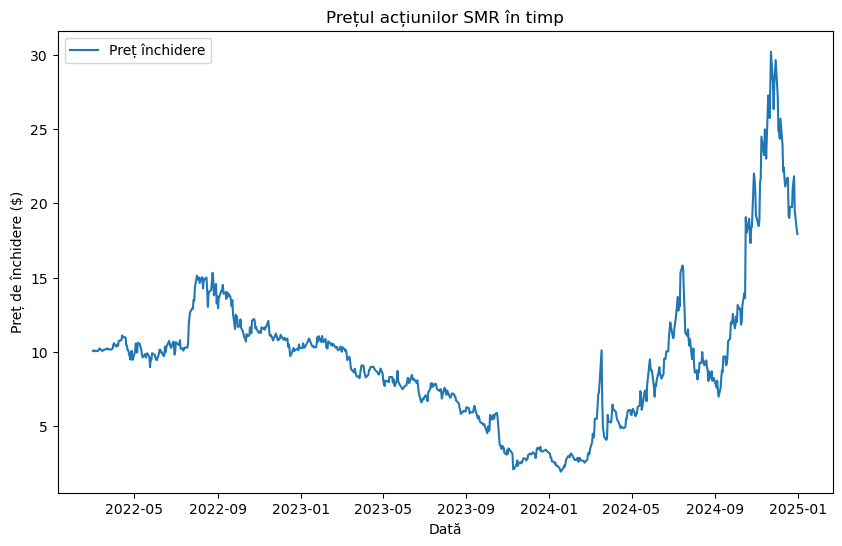

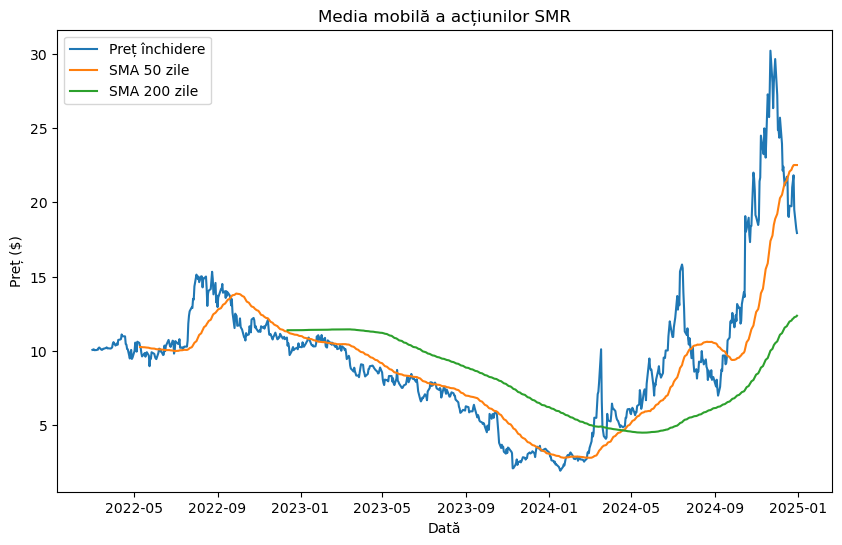

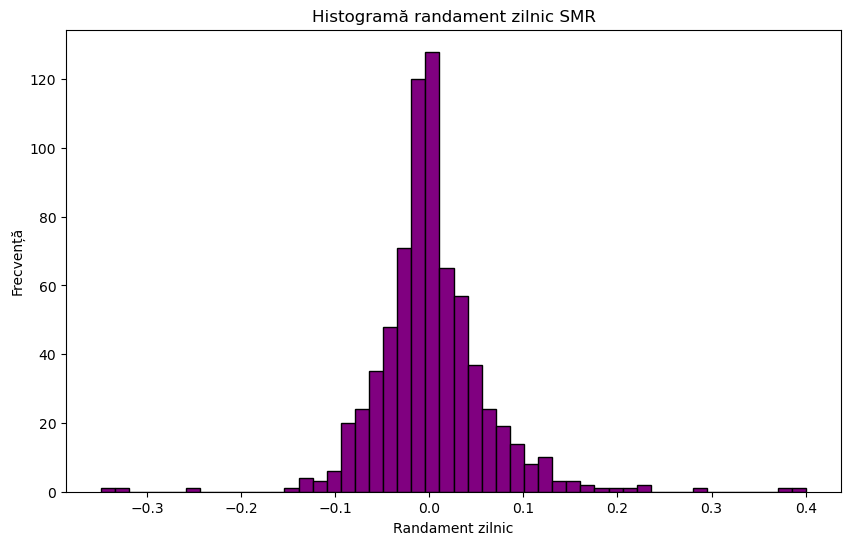

count    713.000000
mean       0.002597
std        0.060152
min       -0.348515
25%       -0.025381
50%       -0.000984
75%        0.027922
max        0.400147
Name: Daily Return, dtype: float64


In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def download_data(symbol, start_date, end_date):
    """
    Funcția descarcă datele acțiunilor pentru un simbol dat și un interval de timp.
    
    Parameters:
    - symbol (str): Simbolul acțiunii (ex: 'SMR')
    - start_date (str): Data de început (ex: '2020-01-01')
    - end_date (str): Data de sfârșit (ex: '2025-01-01')
    
    Returns:
    - DataFrame: Datele descărcate
    """
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def plot_closing_price(data, symbol):
    """
    Funcția plotează prețul de închidere al acțiunii.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Preț închidere')
    plt.title(f'Prețul acțiunilor {symbol} în timp')
    plt.xlabel('Dată')
    plt.ylabel('Preț de închidere ($)')
    plt.legend()
    plt.show()

def calculate_sma(data, window):
    """
    Funcția calculează media mobilă simplă (SMA).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Dimensiunea ferestrei pentru calculul SMA
    
    Returns:
    - Series: SMA calculat
    """
    return data['Close'].rolling(window=window).mean()

def plot_sma(data, symbol):
    """
    Funcția plotează prețul de închidere și mediile mobile.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Preț închidere')
    plt.plot(data['SMA50'], label='SMA 50 zile')
    plt.plot(data['SMA200'], label='SMA 200 zile')
    plt.title(f'Media mobilă a acțiunilor {symbol}')
    plt.xlabel('Dată')
    plt.ylabel('Preț ($)')
    plt.legend()
    plt.show()

def calculate_daily_return(data):
    """
    Funcția calculează randamentul zilnic al acțiunii.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    
    Returns:
    - Series: Randamentul zilnic
    """
    return data['Close'].pct_change()

def plot_daily_return_histogram(data, symbol):
    """
    Funcția plotează o histogramă a randamentului zilnic.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data['Daily Return'].dropna(), bins=50, color='purple', edgecolor='black')
    plt.title(f'Histogramă randament zilnic {symbol}')
    plt.xlabel('Randament zilnic')
    plt.ylabel('Frecvență')
    plt.show()

def print_daily_return_statistics(data):
    """
    Funcția afișează statistici descriptive pentru randamentul zilnic.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    """
    print(data['Daily Return'].describe())

# Funcție principală care integrează totul
def analyze_stock(symbol, start_date, end_date):
    """
    Funcția principală care descarcă datele, calculează indicatorii și plotează graficele relevante.
    
    Parameters:
    - symbol (str): Simbolul acțiunii
    - start_date (str): Data de început pentru analiză
    - end_date (str): Data de sfârșit pentru analiză
    """
    # Descărcăm datele acțiunilor
    data = download_data(symbol, start_date, end_date)
    
    # Plotăm prețul de închidere
    plot_closing_price(data, symbol)
    
    # Calculăm mediile mobile și adăugăm în DataFrame
    data['SMA50'] = calculate_sma(data, 50)
    data['SMA200'] = calculate_sma(data, 200)
    
    # Plotăm mediile mobile
    plot_sma(data, symbol)
    
    # Calculăm randamentul zilnic
    data['Daily Return'] = calculate_daily_return(data)
    
    # Plotăm histogramă pentru randamente zilnice
    plot_daily_return_histogram(data, symbol)
    
    # Afișăm statistici descriptive pentru randamente
    print_daily_return_statistics(data)

# Exemplar de utilizare a funcției principale
analyze_stock('SMR', '2020-01-01', '2025-01-01')


[*********************100%***********************]  1 of 1 completed


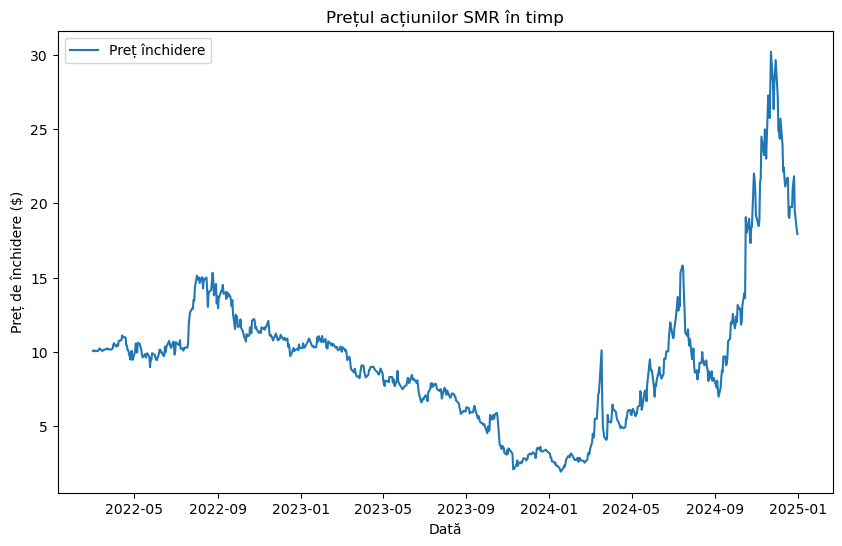

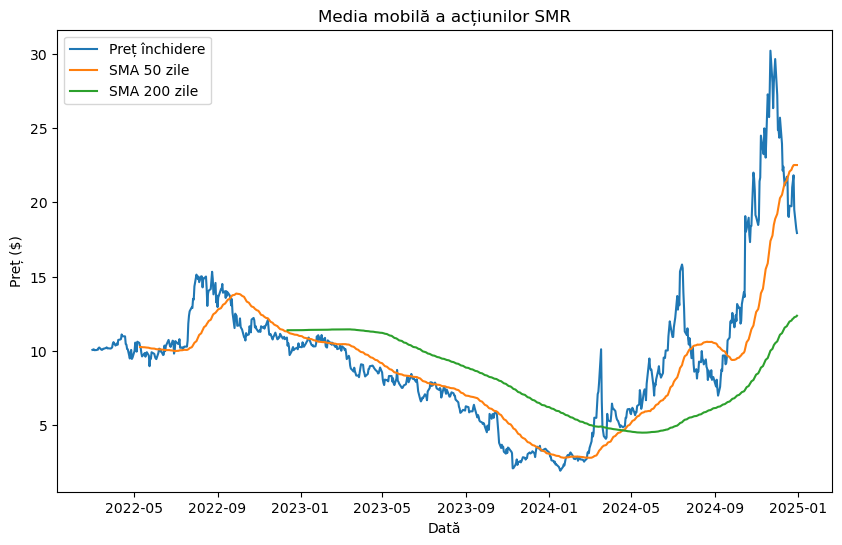

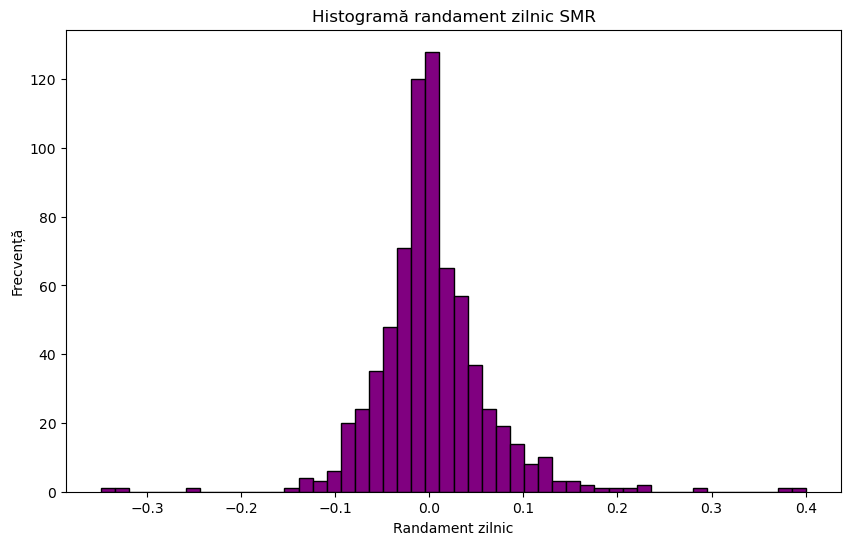

count    713.000000
mean       0.002597
std        0.060152
min       -0.348515
25%       -0.025381
50%       -0.000984
75%        0.027922
max        0.400147
Name: Daily Return, dtype: float64


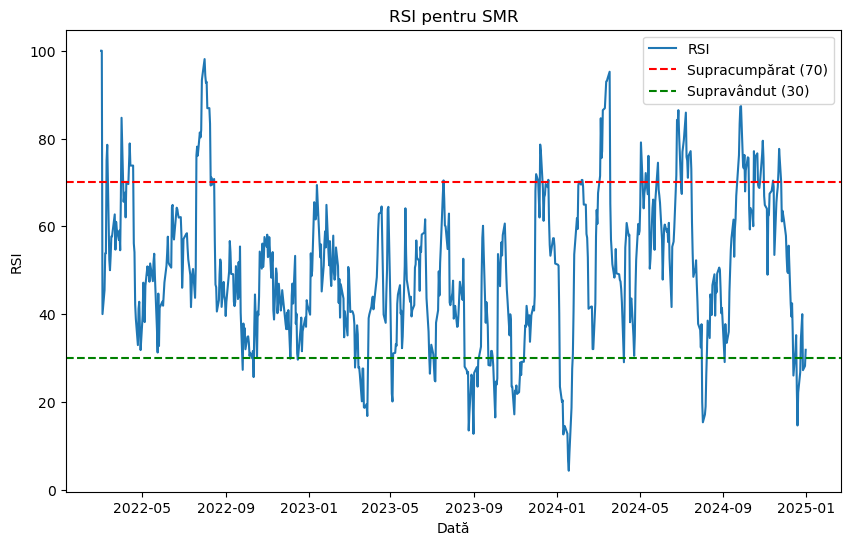

In [11]:
def calculate_rsi(data, window=14):
    """
    Funcția calculează indicatorul RSI (Relative Strength Index).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Perioada de timp (în zile) pe care se calculează RSI (default: 14 zile)
    
    Returns:
    - Series: RSI calculat
    """
    delta = data['Close'].diff()  # Diferențele zilnice ale prețului de închidere
    
    # Calculăm creșterile și scăderile
    gain = delta.where(delta > 0, 0)  # Creșteri (pozitive)
    loss = -delta.where(delta < 0, 0)  # Scăderi (negative)

    # Calculăm media creșterilor și scăderilor pe perioada specificată
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculăm RS și apoi RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def plot_rsi(data, symbol):
    """
    Funcția plotează RSI pentru acțiunile date.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['RSI'], label='RSI')
    plt.axhline(70, color='red', linestyle='--', label='Supracumpărat (70)')
    plt.axhline(30, color='green', linestyle='--', label='Supravândut (30)')
    plt.title(f'RSI pentru {symbol}')
    plt.xlabel('Dată')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

# Modificăm funcția principală pentru a include RSI
def analyze_stock(symbol, start_date, end_date):
    """
    Funcția principală care descarcă datele, calculează indicatorii și plotează graficele relevante.
    
    Parameters:
    - symbol (str): Simbolul acțiunii
    - start_date (str): Data de început pentru analiză
    - end_date (str): Data de sfârșit pentru analiză
    """
    # Descărcăm datele acțiunilor
    data = download_data(symbol, start_date, end_date)
    
    # Plotăm prețul de închidere
    plot_closing_price(data, symbol)
    
    # Calculăm mediile mobile și adăugăm în DataFrame
    data['SMA50'] = calculate_sma(data, 50)
    data['SMA200'] = calculate_sma(data, 200)
    
    # Plotăm mediile mobile
    plot_sma(data, symbol)
    
    # Calculăm randamentul zilnic
    data['Daily Return'] = calculate_daily_return(data)
    
    # Plotăm histogramă pentru randamente zilnice
    plot_daily_return_histogram(data, symbol)
    
    # Afișăm statistici descriptive pentru randamente
    print_daily_return_statistics(data)
    
    # Calculăm RSI și adăugăm în DataFrame
    data['RSI'] = calculate_rsi(data)
    
    # Plotăm RSI
    plot_rsi(data, symbol)

# Exemplar de utilizare a funcției principale cu RSI
analyze_stock('SMR', '2020-01-01', '2025-01-01')


[*********************100%***********************]  1 of 1 completed


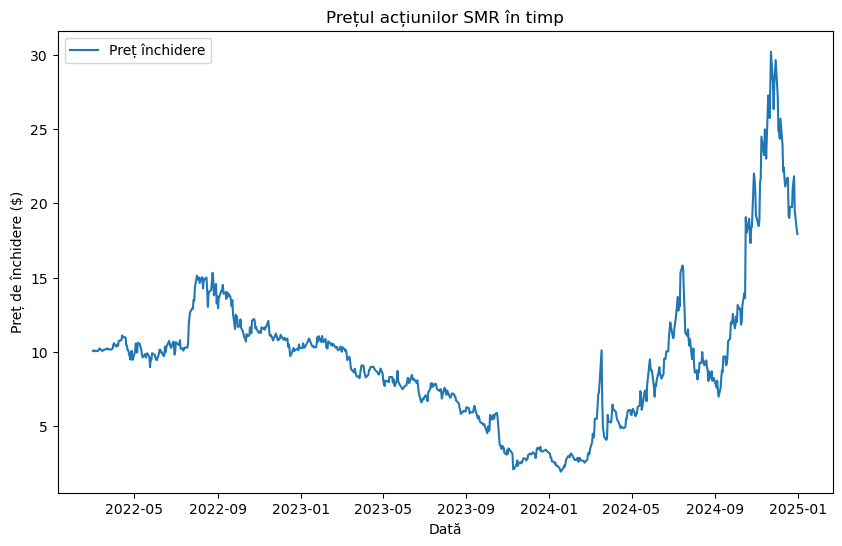

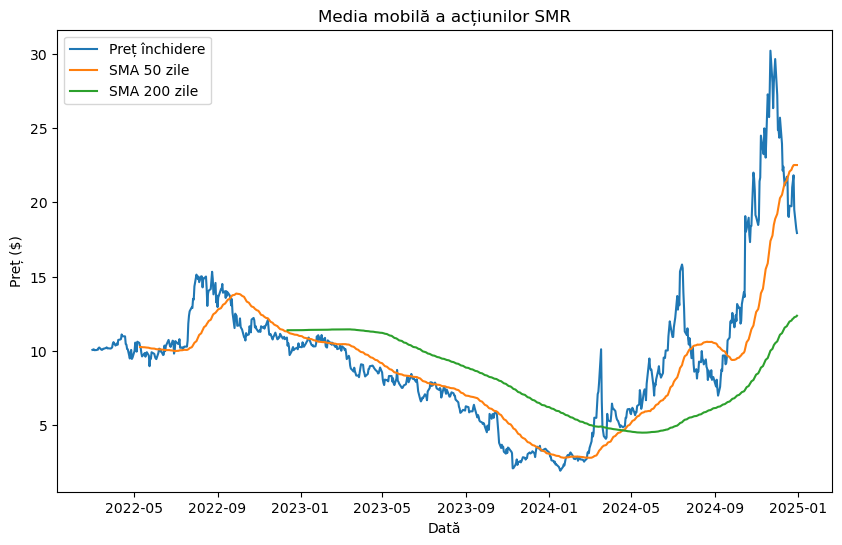

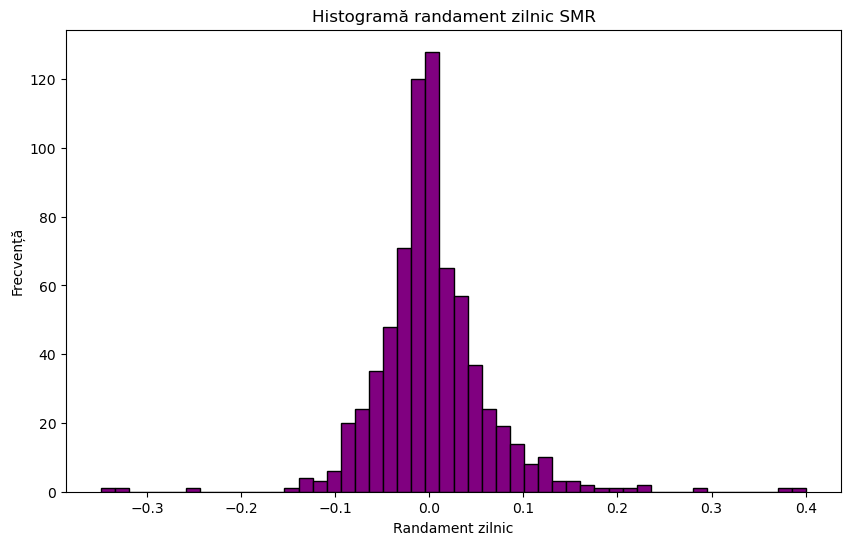

count    713.000000
mean       0.002597
std        0.060152
min       -0.348515
25%       -0.025381
50%       -0.000984
75%        0.027922
max        0.400147
Name: Daily Return, dtype: float64


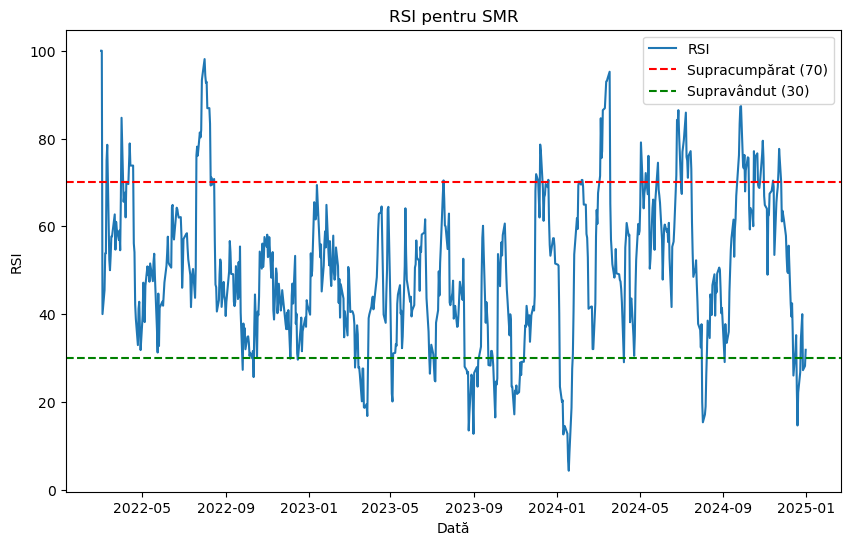

In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def download_data(symbol, start_date, end_date):
    """
    Funcția descarcă datele acțiunilor pentru un simbol dat și un interval de timp.
    
    Parameters:
    - symbol (str): Simbolul acțiunii (ex: 'SMR')
    - start_date (str): Data de început (ex: '2020-01-01')
    - end_date (str): Data de sfârșit (ex: '2025-01-01')
    
    Returns:
    - DataFrame: Datele descărcate
    """
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def plot_closing_price(data, symbol):
    """
    Funcția plotează prețul de închidere al acțiunii.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Preț închidere')
    plt.title(f'Prețul acțiunilor {symbol} în timp')
    plt.xlabel('Dată')
    plt.ylabel('Preț de închidere ($)')
    plt.legend()
    plt.show()

def calculate_sma(data, window):
    """
    Funcția calculează media mobilă simplă (SMA).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Dimensiunea ferestrei pentru calculul SMA
    
    Returns:
    - Series: SMA calculat
    """
    return data['Close'].rolling(window=window).mean()

def plot_sma(data, symbol):
    """
    Funcția plotează prețul de închidere și mediile mobile.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label='Preț închidere')
    plt.plot(data['SMA50'], label='SMA 50 zile')
    plt.plot(data['SMA200'], label='SMA 200 zile')
    plt.title(f'Media mobilă a acțiunilor {symbol}')
    plt.xlabel('Dată')
    plt.ylabel('Preț ($)')
    plt.legend()
    plt.show()

def calculate_daily_return(data):
    """
    Funcția calculează randamentul zilnic al acțiunii.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    
    Returns:
    - Series: Randamentul zilnic
    """
    return data['Close'].pct_change()

def plot_daily_return_histogram(data, symbol):
    """
    Funcția plotează o histogramă a randamentului zilnic.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    plt.figure(figsize=(10, 6))
    plt.hist(data['Daily Return'].dropna(), bins=50, color='purple', edgecolor='black')
    plt.title(f'Histogramă randament zilnic {symbol}')
    plt.xlabel('Randament zilnic')
    plt.ylabel('Frecvență')
    plt.show()

def print_daily_return_statistics(data):
    """
    Funcția afișează statistici descriptive pentru randamentul zilnic.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    """
    print(data['Daily Return'].describe())

def calculate_rsi(data, window=14):
    """
    Funcția calculează indicatorul RSI (Relative Strength Index).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Perioada de timp (în zile) pe care se calculează RSI (default: 14 zile)
    
    Returns:
    - Series: RSI calculat
    """
    delta = data['Close'].diff()  # Diferențele zilnice ale prețului de închidere
    
    # Calculăm creșterile și scăderile
    gain = delta.where(delta > 0, 0)  # Creșteri (pozitive)
    loss = -delta.where(delta < 0, 0)  # Scăderi (negative)

    # Calculăm media creșterilor și scăderilor pe perioada specificată
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculăm RS și apoi RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def plot_rsi(data, symbol):
    """
    Funcția plotează RSI pentru acțiunile date.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['RSI'], label='RSI')
    plt.axhline(70, color='red', linestyle='--', label='Supracumpărat (70)')
    plt.axhline(30, color='green', linestyle='--', label='Supravândut (30)')
    plt.title(f'RSI pentru {symbol}')
    plt.xlabel('Dată')
    plt.ylabel('RSI')
    plt.legend()
    plt.show()

# Funcție principală care integrează totul
def analyze_stock(symbol, start_date, end_date):
    """
    Funcția principală care descarcă datele, calculează indicatorii și plotează graficele relevante.
    
    Parameters:
    - symbol (str): Simbolul acțiunii
    - start_date (str): Data de început pentru analiză
    - end_date (str): Data de sfârșit pentru analiză
    """
    # Descărcăm datele acțiunilor
    data = download_data(symbol, start_date, end_date)
    
    # Plotăm prețul de închidere
    plot_closing_price(data, symbol)
    
    # Calculăm mediile mobile și adăugăm în DataFrame
    data['SMA50'] = calculate_sma(data, 50)
    data['SMA200'] = calculate_sma(data, 200)
    
    # Plotăm mediile mobile
    plot_sma(data, symbol)
    
    # Calculăm randamentul zilnic
    data['Daily Return'] = calculate_daily_return(data)
    
    # Plotăm histogramă pentru randamente zilnice
    plot_daily_return_histogram(data, symbol)
    
    # Afișăm statistici descriptive pentru randamente
    print_daily_return_statistics(data)
    
    # Calculăm RSI și adăugăm în DataFrame
    data['RSI'] = calculate_rsi(data)
    
    # Plotăm RSI
    plot_rsi(data, symbol)

# Exemplar de utilizare a funcției principale cu RSI
analyze_stock('SMR', '2020-01-01', '2025-01-01')


[*********************100%***********************]  1 of 1 completed


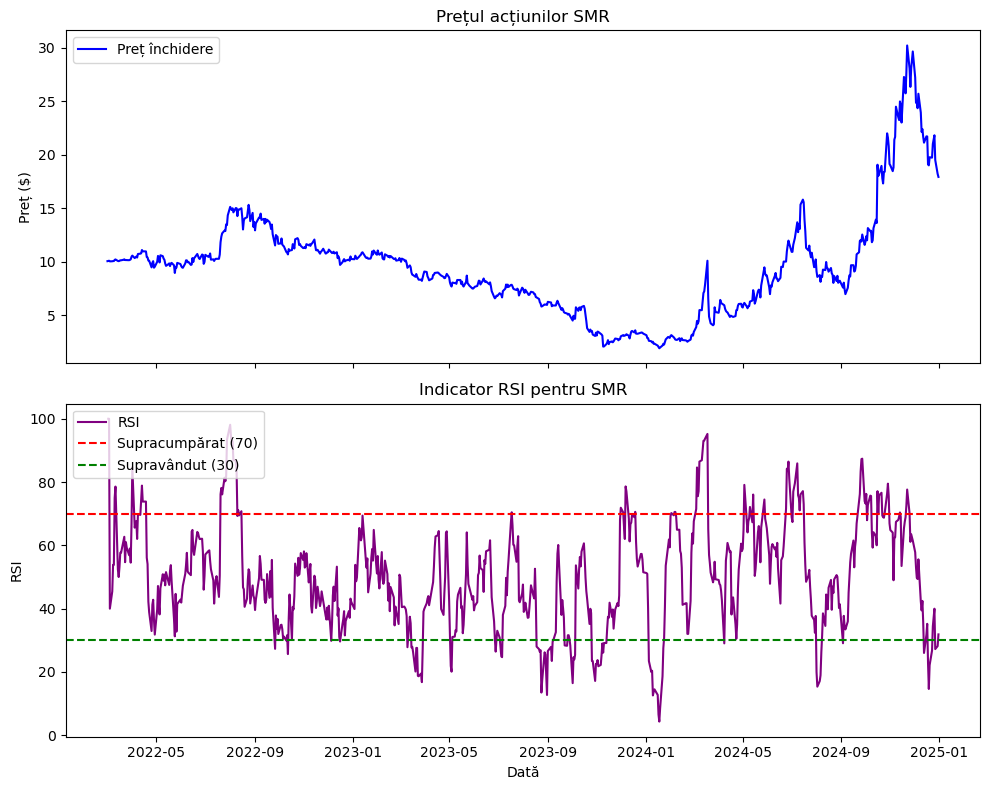

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def download_data(symbol, start_date, end_date):
    """
    Funcția descarcă datele acțiunilor pentru un simbol dat și un interval de timp.
    
    Parameters:
    - symbol (str): Simbolul acțiunii (ex: 'SMR')
    - start_date (str): Data de început (ex: '2020-01-01')
    - end_date (str): Data de sfârșit (ex: '2025-01-01')
    
    Returns:
    - DataFrame: Datele descărcate
    """
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def calculate_sma(data, window):
    """
    Funcția calculează media mobilă simplă (SMA).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Dimensiunea ferestrei pentru calculul SMA
    
    Returns:
    - Series: SMA calculat
    """
    return data['Close'].rolling(window=window).mean()

def calculate_daily_return(data):
    """
    Funcția calculează randamentul zilnic al acțiunii.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    
    Returns:
    - Series: Randamentul zilnic
    """
    return data['Close'].pct_change()

def calculate_rsi(data, window=14):
    """
    Funcția calculează indicatorul RSI (Relative Strength Index).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Perioada de timp (în zile) pe care se calculează RSI (default: 14 zile)
    
    Returns:
    - Series: RSI calculat
    """
    delta = data['Close'].diff()  # Diferențele zilnice ale prețului de închidere
    
    # Calculăm creșterile și scăderile
    gain = delta.where(delta > 0, 0)  # Creșteri (pozitive)
    loss = -delta.where(delta < 0, 0)  # Scăderi (negative)

    # Calculăm media creșterilor și scăderilor pe perioada specificată
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculăm RS și apoi RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def plot_price_and_rsi(data, symbol):
    """
    Funcția plotează prețul acțiunilor și indicatorul RSI în două subplote.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    
    # Plotăm prețul acțiunii în primul subplot
    ax1.plot(data['Close'], label='Preț închidere', color='blue')
    ax1.set_title(f'Prețul acțiunilor {symbol}')
    ax1.set_ylabel('Preț ($)')
    ax1.legend(loc='upper left')
    
    # Plotăm RSI în al doilea subplot
    ax2.plot(data['RSI'], label='RSI', color='purple')
    ax2.axhline(70, color='red', linestyle='--', label='Supracumpărat (70)')
    ax2.axhline(30, color='green', linestyle='--', label='Supravândut (30)')
    ax2.set_title(f'Indicator RSI pentru {symbol}')
    ax2.set_ylabel('RSI')
    ax2.set_xlabel('Dată')
    ax2.legend(loc='upper left')
    
    # Afișăm graficele
    plt.tight_layout()
    plt.show()

# Funcție principală care integrează totul
def analyze_stock(symbol, start_date, end_date):
    """
    Funcția principală care descarcă datele, calculează indicatorii și plotează graficele relevante.
    
    Parameters:
    - symbol (str): Simbolul acțiunii
    - start_date (str): Data de început pentru analiză
    - end_date (str): Data de sfârșit pentru analiză
    """
    # Descărcăm datele acțiunilor
    data = download_data(symbol, start_date, end_date)
    
    # Calculăm mediile mobile și adăugăm în DataFrame
    data['SMA50'] = calculate_sma(data, 50)
    data['SMA200'] = calculate_sma(data, 200)
    
    # Calculăm randamentul zilnic
    data['Daily Return'] = calculate_daily_return(data)
    
    # Calculăm RSI și adăugăm în DataFrame
    data['RSI'] = calculate_rsi(data)
    
    # Plotăm prețul și RSI
    plot_price_and_rsi(data, symbol)

# Exemplar de utilizare a funcției principale cu RSI și prețul acțiunilor
analyze_stock('SMR', '2020-01-01', '2025-01-01')


[*********************100%***********************]  1 of 1 completed


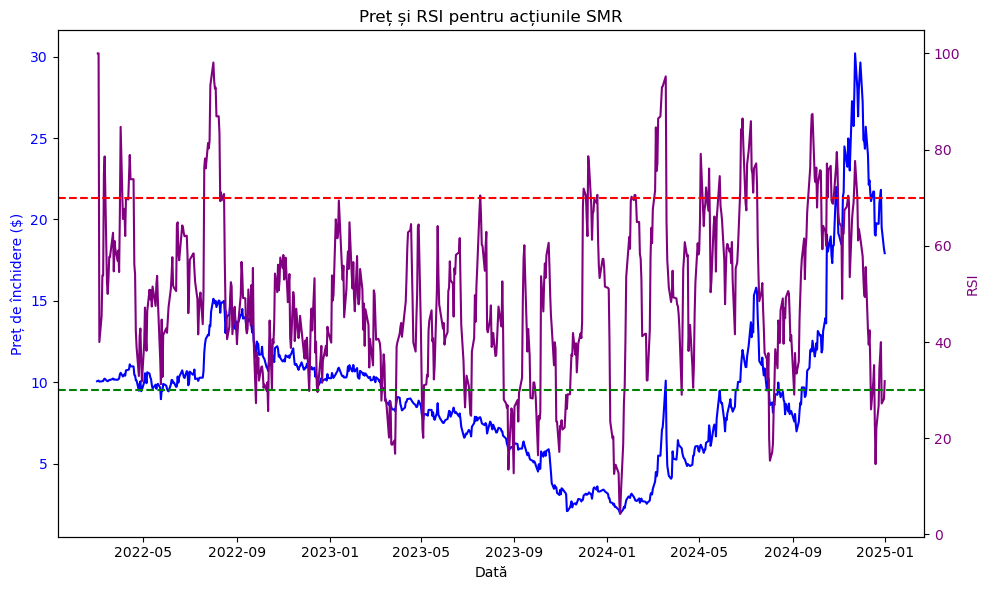

In [18]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def download_data(symbol, start_date, end_date):
    """
    Funcția descarcă datele acțiunilor pentru un simbol dat și un interval de timp.
    
    Parameters:
    - symbol (str): Simbolul acțiunii (ex: 'SMR')
    - start_date (str): Data de început (ex: '2020-01-01')
    - end_date (str): Data de sfârșit (ex: '2025-01-01')
    
    Returns:
    - DataFrame: Datele descărcate
    """
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def calculate_sma(data, window):
    """
    Funcția calculează media mobilă simplă (SMA).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Dimensiunea ferestrei pentru calculul SMA
    
    Returns:
    - Series: SMA calculat
    """
    return data['Close'].rolling(window=window).mean()

def calculate_rsi(data, window=14):
    """
    Funcția calculează indicatorul RSI (Relative Strength Index).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Perioada de timp (în zile) pe care se calculează RSI (default: 14 zile)
    
    Returns:
    - Series: RSI calculat
    """
    delta = data['Close'].diff()  # Diferențele zilnice ale prețului de închidere
    
    # Calculăm creșterile și scăderile
    gain = delta.where(delta > 0, 0)  # Creșteri (pozitive)
    loss = -delta.where(delta < 0, 0)  # Scăderi (negative)

    # Calculăm media creșterilor și scăderilor pe perioada specificată
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculăm RS și apoi RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def plot_price_and_rsi_combined(data, symbol):
    """
    Funcția plotează prețul acțiunilor și indicatorul RSI pe același grafic cu axe diferite.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Prima axă Y (pentru prețul acțiunilor)
    ax1.set_xlabel('Dată')
    ax1.set_ylabel('Preț de închidere ($)', color='blue')
    ax1.plot(data.index, data['Close'], label='Preț închidere', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # A doua axă Y (pentru RSI)
    ax2 = ax1.twinx()  # Instanțiem o axă secundară care împarte axa X
    ax2.set_ylabel('RSI', color='purple')
    ax2.plot(data.index, data['RSI'], label='RSI', color='purple')
    ax2.axhline(70, color='red', linestyle='--', label='Supracumpărat (70)')
    ax2.axhline(30, color='green', linestyle='--', label='Supravândut (30)')
    ax2.tick_params(axis='y', labelcolor='purple')

    # Titlu și afișarea graficului
    plt.title(f'Preț și RSI pentru acțiunile {symbol}')
    fig.tight_layout()  # Ajustează layout-ul
    plt.show()

# Funcție principală care integrează totul
def analyze_stock(symbol, start_date, end_date):
    """
    Funcția principală care descarcă datele, calculează indicatorii și plotează graficele relevante.
    
    Parameters:
    - symbol (str): Simbolul acțiunii
    - start_date (str): Data de început pentru analiză
    - end_date (str): Data de sfârșit pentru analiză
    """
    # Descărcăm datele acțiunilor
    data = download_data(symbol, start_date, end_date)
    
    # Calculăm mediile mobile și adăugăm în DataFrame
    data['SMA50'] = calculate_sma(data, 50)
    data['SMA200'] = calculate_sma(data, 200)
    
    # Calculăm RSI și adăugăm în DataFrame
    data['RSI'] = calculate_rsi(data)
    
    # Plotăm prețul și RSI pe același grafic
    plot_price_and_rsi_combined(data, symbol)

# Exemplar de utilizare a funcției principale cu RSI și prețul acțiunilor
analyze_stock('SMR', '2020-01-01', '2025-01-01')


[*********************100%***********************]  1 of 1 completed


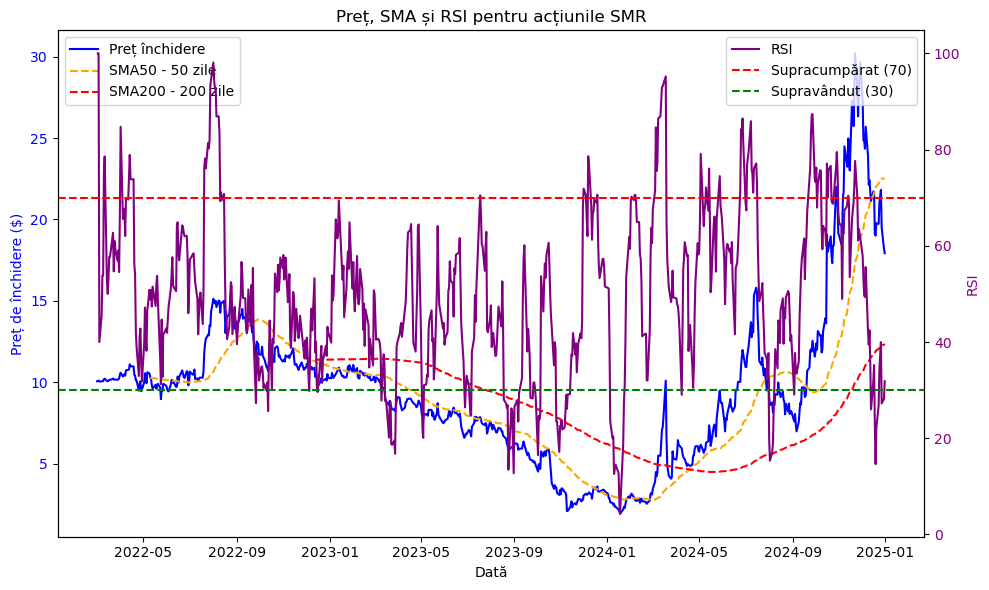

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def download_data(symbol, start_date, end_date):
    """
    Funcția descarcă datele acțiunilor pentru un simbol dat și un interval de timp.
    
    Parameters:
    - symbol (str): Simbolul acțiunii (ex: 'SMR')
    - start_date (str): Data de început (ex: '2020-01-01')
    - end_date (str): Data de sfârșit (ex: '2025-01-01')
    
    Returns:
    - DataFrame: Datele descărcate
    """
    data = yf.download(symbol, start=start_date, end=end_date)
    return data

def calculate_sma(data, window):
    """
    Funcția calculează media mobilă simplă (SMA).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Dimensiunea ferestrei pentru calculul SMA
    
    Returns:
    - Series: SMA calculat
    """
    return data['Close'].rolling(window=window).mean()

def calculate_rsi(data, window=14):
    """
    Funcția calculează indicatorul RSI (Relative Strength Index).
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Perioada de timp (în zile) pe care se calculează RSI (default: 14 zile)
    
    Returns:
    - Series: RSI calculat
    """
    delta = data['Close'].diff()  # Diferențele zilnice ale prețului de închidere
    
    # Calculăm creșterile și scăderile
    gain = delta.where(delta > 0, 0)  # Creșteri (pozitive)
    loss = -delta.where(delta < 0, 0)  # Scăderi (negative)

    # Calculăm media creșterilor și scăderilor pe perioada specificată
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    
    # Calculăm RS și apoi RSI
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def plot_price_and_rsi_combined(data, symbol):
    """
    Funcția plotează prețul acțiunilor, liniile de trend (SMA50, SMA200) și indicatorul RSI pe același grafic cu axe diferite.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - symbol (str): Simbolul acțiunii
    """
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Prima axă Y (pentru prețul acțiunilor și liniile de trend)
    ax1.set_xlabel('Dată')
    ax1.set_ylabel('Preț de închidere ($)', color='blue')
    ax1.plot(data.index, data['Close'], label='Preț închidere', color='blue')
    ax1.plot(data.index, data['SMA50'], label='SMA50 - 50 zile', color='orange', linestyle='--')
    ax1.plot(data.index, data['SMA200'], label='SMA200 - 200 zile', color='red', linestyle='--')
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Legenda pentru liniile de trend
    ax1.legend(loc='upper left')

    # A doua axă Y (pentru RSI)
    ax2 = ax1.twinx()  # Instanțiem o axă secundară care împarte axa X
    ax2.set_ylabel('RSI', color='purple')
    ax2.plot(data.index, data['RSI'], label='RSI', color='purple')
    ax2.axhline(70, color='red', linestyle='--', label='Supracumpărat (70)')
    ax2.axhline(30, color='green', linestyle='--', label='Supravândut (30)')
    ax2.tick_params(axis='y', labelcolor='purple')

    # Legenda pentru RSI
    ax2.legend(loc='upper right')

    # Titlu și afișarea graficului
    plt.title(f'Preț, SMA și RSI pentru acțiunile {symbol}')
    fig.tight_layout()  # Ajustează layout-ul
    plt.show()

# Funcție principală care integrează totul
def analyze_stock(symbol, start_date, end_date):
    """
    Funcția principală care descarcă datele, calculează indicatorii și plotează graficele relevante.
    
    Parameters:
    - symbol (str): Simbolul acțiunii
    - start_date (str): Data de început pentru analiză
    - end_date (str): Data de sfârșit pentru analiză
    """
    # Descărcăm datele acțiunilor
    data = download_data(symbol, start_date, end_date)
    
    # Calculăm mediile mobile și adăugăm în DataFrame
    data['SMA50'] = calculate_sma(data, 50)
    data['SMA200'] = calculate_sma(data, 200)
    
    # Calculăm RSI și adăugăm în DataFrame
    data['RSI'] = calculate_rsi(data)
    
    # Plotăm prețul, liniile de trend și RSI pe același grafic
    plot_price_and_rsi_combined(data, symbol)

# Exemplar de utilizare a funcției principale cu RSI, prețul acțiunilor și liniile de trend
analyze_stock('SMR', '2020-01-01', '2025-01-01')


In [23]:
# Importăm librăriile necesare
import yfinance as yf

def get_company_info(symbol):
    """
    Funcția returnează informații despre companie, cum ar fi descrierea și alte detalii relevante.
    
    Parameters:
    - symbol (str): Simbolul companiei (ex: 'SMR')
    
    Returns:
    - dict: Informațiile despre companie
    """
    stock = yf.Ticker(symbol)
    info = stock.info
    return info

def print_company_description(symbol):
    """
    Funcția afișează descrierea companiei și alte detalii relevante.
    
    Parameters:
    - symbol (str): Simbolul companiei (ex: 'SMR')
    """
    company_info = get_company_info(symbol)
    
    # Afișăm descrierea și alte detalii
    print(f"Compania: {company_info.get('longName', 'N/A')}")
    print(f"Sector: {company_info.get('sector', 'N/A')}")
    print(f"Industrie: {company_info.get('industry', 'N/A')}")
    print(f"Țara: {company_info.get('country', 'N/A')}")
    print(f"Descriere:\n{company_info.get('longBusinessSummary', 'N/A')}")

# Exemplu de utilizare pentru compania SMR
print_company_description('SMR')


Compania: NuScale Power Corporation
Sector: Industrials
Industrie: Specialty Industrial Machinery
Țara: United States
Descriere:
NuScale Power Corporation engages in the development and sale of modular light water reactor nuclear power plants to supply energy for electrical generation, district heating, desalination, hydrogen production, and other process heat applications. It offers NuScale Power Module (NPM), a water reactor that can generate 77 megawatts of electricity (MWe); and VOYGR power plant designs for three facility sizes that are capable of housing from one to four and six or twelve NPMs. The company was founded in 2007 and is headquartered in Portland, Oregon. NuScale Power Corporation operates as a subsidiary of Fluor Enterprises, Inc.


In [25]:
import numpy as np

def calculate_sma(data, window):
    """
    Funcția calculează media mobilă simplă (SMA).
    
    Parameters:
    - data (array-like): Datele acțiunii
    - window (int): Dimensiunea ferestrei pentru calculul SMA
    
    Returns:
    - array-like: SMA calculat
    """
    return data.rolling(window=window).mean()

def calculate_mae_trend(data, window):
    """
    Funcția calculează MAE bazat pe diferența dintre valorile curente și media mobilă simplă (SMA).
    
    Parameters:
    - data (array-like): Datele acțiunii (de exemplu, prețurile de închidere)
    - window (int): Dimensiunea ferestrei pentru calculul SMA (ex. 50 sau 200 zile)
    
    Returns:
    - float: Indicatorul de trend bazat pe MAE
    """
    # Calculăm SMA
    sma = calculate_sma(data, window)
    
    # Eliminăm valorile NaN din SMA, datorate ferestrei de rulare
    valid_data = data[window-1:]
    valid_sma = sma[window-1:]
    
    # Calculăm MAE între valorile curente și SMA
    mae_trend = np.mean(np.abs(valid_data - valid_sma))
    
    return mae_trend

# Exemplu de utilizare
import yfinance as yf

# Descărcăm datele acțiunilor SMR pentru exemplificare
data = yf.download('SMR', start='2020-01-01', end='2025-01-01')

# Calculăm MAE pentru trendul bazat pe SMA50
mae_trend_50 = calculate_mae_trend(data['Close'], window=50)
print(f"Indicatorul de trend MAE (SMA50): {mae_trend_50}")

# Calculăm MAE pentru trendul bazat pe SMA200
mae_trend_200 = calculate_mae_trend(data['Close'], window=200)
print(f"Indicatorul de trend MAE (SMA200): {mae_trend_200}")


[*********************100%***********************]  1 of 1 completed

Indicatorul de trend MAE (SMA50): 1.5905413611777743
Indicatorul de trend MAE (SMA200): 3.828415235943007


In [34]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

def calculate_sma(data, window):
    """
    Funcția calculează media mobilă simplă (SMA).
    
    Parameters:
    - data (array-like): Datele acțiunii
    - window (int): Dimensiunea ferestrei pentru calculul SMA
    
    Returns:
    - Series: SMA calculat
    """
    return data.rolling(window=window).mean()

def calculate_mae_envelope(data, window, percent):
    """
    Funcția calculează Moving Average Envelope (MAE) pe baza unei medii mobile simple (SMA).
    
    Parameters:
    - data (array-like): Datele acțiunii
    - window (int): Dimensiunea ferestrei pentru calculul SMA
    - percent (float): Procentajul pentru distanța deasupra și sub SMA
    
    Returns:
    - DataFrame: Conține SMA, Upper Envelope și Lower Envelope
    """
    sma = calculate_sma(data, window)
    
    # Calculăm envelope-urile superioare și inferioare
    upper_envelope = sma * (1 + percent / 100)
    lower_envelope = sma * (1 - percent / 100)
    
    # Returnăm un DataFrame cu valorile SMA și ale envelope-urilor
    envelopes = pd.DataFrame({
        'SMA': sma,
        'Upper Envelope': upper_envelope,
        'Lower Envelope': lower_envelope
    })
    
    return envelopes

def plot_mae_envelope(data, window, percent, symbol):
    """
    Funcția plotează prețul de închidere, SMA și envelope-urile pentru o acțiune.
    
    Parameters:
    - data (DataFrame): Datele acțiunii
    - window (int): Dimensiunea ferestrei pentru SMA
    - percent (float): Procentajul pentru calculul envelope-urilor
    - symbol (str): Simbolul acțiunii (ex: 'SMR')
    """
    envelopes = calculate_mae_envelope(data['Close'], window, percent)
    
    plt.figure(figsize=(10, 6))
    plt.plot(data['Close'], label=f'Preț închidere {symbol}', color='blue')
    plt.plot(envelopes['SMA'], label=f'SMA {window} zile', color='orange')
    plt.plot(envelopes['Upper Envelope'], label=f'Upper Envelope {percent}%')
    plt.plot(envelopes['Lower Envelope'], label=f'Lower Envelope {percent}%')
    
    plt.title(f'Moving Average Envelope pentru {symbol}')
    plt.xlabel('Dată')
    plt.ylabel('Preț ($)')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

# Exemplu de utilizare pentru simbolul SMR
data = yf.download('SMR', start='2020-01-01', end='2025-01-01')
window = 50  # Fereastra SMA de 50 de zile
percent = 2  # Envelope de 2%

plot_mae_envelope(data, window, percent, 'SMR')


[*********************100%***********************]  1 of 1 completed


ValueError: If using all scalar values, you must pass an index